SMRTTECH 4SC3 Project by Tony Kim & Hussein Abdulsada

1. Covid Case Prediction model - Ontario

2. Assessment Center Map in Ontario

3. World Daily Covid Case Analysis

4. World Daily Case Analysis & Death Prediction of Each Country using a different dataset

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import plotly.express as px
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler


##COVID-19 Assessment Center Map

To show the location of Covid test center in Ontario

In [ ]:
#Load the datasets
df_AC = pd.read_csv("/content/assessment_centre_locations.csv")
df_AC

testing_enrolled  location_id  assessment_centre  \
0                  1.0            1                1.0   
1                  NaN            2                1.0   
2                  NaN            3                1.0   
3                  NaN            4                1.0   
4                  1.0            5                1.0   
...                ...          ...                ...   
2239               NaN         2165                NaN   
2240               NaN         2166                NaN   
2241               NaN         2167                NaN   
2242               NaN         2168                NaN   
2243               NaN         2169                NaN   

                                      location_name  \
0                     Blanche River Health-Kirkland   
1     South Georgian Bay Regional Assessment Centre   
2                         Midland Assessment Centre   
3                    COVID-19 Testing Clinic Milton   
4              Oakville Trafalgar Memorial Hospital   
...                                             ...   
2239                                         Rexall   
2240                                         Rexall   
2241                                         Rexall   
2242                       Shoppers Simply Pharmacy   
2243                          Northview Remedy's Rx   

                                    operated_by           city  \
0     Blanche River Health (Kirkland Lake site)  Kirkland Lake   
1               Georgian Bay Family Health Team    Collingwood   
2                 Georgian Bay General Hospital        Midland   
3                                     FH Health         Milton   
4                    Halton Healthcare Services       Oakville   
...                                         ...            ...   
2239                                        NaN      Brantford   
2240                                        NaN       Hamilton   
2241                                        NaN         Ottawa   
2242                                        NaN        Toronto   
2243                                        NaN      Brantford   

                                    address                 address_fr  \
0                  145 Government Road East  145 chemin Government Est   
1                        490 Ontario Street                        NaN   
2                    1156 St. Andrews Drive                        NaN   
3                   725 Bronte Street South         725 rue Bronte Sud   
4                        3001 Hospital Gate         3001 Hospital Gate   
...                                     ...                        ...   
2239                    260 St. Paul Avenue                        NaN   
2240              234 Parkdale Avenue North                        NaN   
2241                 1190 Wellington Street                        NaN   
2242  1223 St. Clair Avenue West, Unit 1221                        NaN   
2243                     222 Fairview Drive                        NaN   

     postal_code province  ...  french_language_services  free_parking  \
0        P2N 3P4       ON  ...                       NaN           NaN   
1        L9Y 1N6       ON  ...                       NaN           NaN   
2        L4R 4P4       ON  ...                       1.0           1.0   
3        L9T 9K1       ON  ...                       NaN           1.0   
4        L6M 0L8       ON  ...                       NaN           1.0   
...          ...      ...  ...                       ...           ...   
2239     N3R 4M7       ON  ...                       NaN           NaN   
2240     L8H 5X5       ON  ...                       NaN           NaN   
2241     K1Y 2Z5       ON  ...                       NaN           NaN   
2242     M6E 1B5       ON  ...                       NaN           NaN   
2243     N3R 2W9       ON  ...                       NaN           NaN   

     weeks_pregnant general_population asl_interpretation email first_nations

In [ ]:
#Assessment Center Map 1
fig = px.scatter_geo(df_AC, lat='latitude', lon='longitude', color='city', hover_name="location_name", scope="north america", basemap_visible = True)
fig.show()

In [ ]:
#Assessment Center Map 2 - Real Map
fig = px.scatter_mapbox(df_AC, lat="latitude", lon="longitude", hover_name="location_name", hover_data=["address", "province", "postal_code"],
                        color="city", zoom=5, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

##Daily Case Prediction in Ontario
To predict the daily total number of confirmed cases in Ontario.

In [ ]:
#Total daily confirmed cases in Ontario - from 3/24/2020 to 10/18/2022
dataset = pd.read_csv("/content/daily_change_in_cases_by_phu.csv")

In [ ]:
#Convert Date column strings to Datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'])
split_date = pd.datetime(2021,7,5)
dataset['Date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



0     2020-03-24
1     2020-03-25
2     2020-03-26
3     2020-03-27
4     2020-03-28
         ...    
934   2022-10-14
935   2022-10-15
936   2022-10-16
937   2022-10-17
938   2022-10-18
Name: Date, Length: 939, dtype: datetime64[ns]

In [ ]:
dataset_half = dataset.loc[dataset['Date']>split_date]
dataset_half
df_Date = dataset_half.pop('Date').reset_index(drop=True)
df_Total = dataset_half.pop('Total').reset_index(drop=True)

In [ ]:
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Day'] = dataset['Date'].dt.day

In [ ]:
dataset.describe()

Algoma_District  Brant_County  Chatham_Kent  Durham_Region  \
count       939.000000    939.000000    939.000000     939.000000   
mean         11.080937     14.267306     10.648562      73.385517   
std          18.454169     22.323363     16.832741     118.040326   
min          -2.000000     -1.000000     -4.000000      -6.000000   
25%           0.000000      2.000000      1.000000      16.000000   
50%           1.000000      8.000000      5.000000      38.000000   
75%          14.000000     18.000000     13.000000      81.500000   
max         119.000000    226.000000    216.000000    1054.000000   

       Eastern_Ontario  Grey_Bruce  Haldimand_Norfolk  \
count       939.000000  939.000000         939.000000   
mean         19.696486   11.042599          10.671991   
std          37.039892   18.020372          16.485471   
min          -8.000000   -4.000000          -2.000000   
25%           2.000000    1.000000           1.000000   
50%           9.000000    4.000000           5.000000   
75%          22.000000   13.000000          13.500000   
max         384.000000  171.000000         151.000000   

       Haliburton_Kawartha_Pine_Ridge  Halton_Region  City_of_Hamilton  ...  \
count                      939.000000     939.000000        939.000000  ...   
mean                        12.119276      57.837061         71.767838  ...   
std                         21.112922     101.981279        106.751307  ...   
min                         -9.000000      -3.000000         -8.000000  ...   
25%                          1.000000      10.000000         13.000000  ...   
50%                          5.000000      30.000000         43.000000  ...   
75%                         14.000000      62.000000         89.000000  ...   
max                        209.000000     854.000000       1032.000000  ...   

       Simcoe_Muskoka_District  Southwestern  Sudbury_and_District  \
count               939.000000    939.000000            939.000000   
mean                 56.071353     17.518637             20.294995   
std                  82.064774     25.257827             30.147316   
min                  -4.000000     -3.000000             -8.000000   
25%                  10.000000      3.000000              1.000000   
50%                  32.000000     10.000000              7.000000   
75%                  64.500000     23.000000             30.000000   
max                 850.000000    266.000000            240.000000   

       Thunder_Bay_District  Timiskaming      Toronto  \
count            939.000000   939.000000   939.000000   
mean              17.405751     2.729499   380.292865   
std               24.722477     5.329974   487.070835   
min               -3.000000    -2.000000  -119.000000   
25%                0.000000     0.000000   104.500000   
50%                6.000000     0.000000   235.000000   
75%               25.000000     3.000000   465.500000   
max              138.000000    50.000000  4721.000000   

       Wellington_Dufferin_Guelph  Windsor_Essex_County  York_Region  \
count                  939.000000            939.000000   939.000000   
mean                    26.631523             52.479233   131.872204   
std                     41.327421             67.664577   191.976224   
min                     -2.000000             -8.000000    -5.000000   
25%                      5.000000             13.000000    32.000000   
50%                     14.000000             34.000000    78.000000   
75%                     32.500000             62.000000   150.000000   
max                    544.000000            558.000000  1711.000000   

              Total  
count    939.000000  
mean    1573.304579  
std     2075.555333  
min        0.000000  
25%      423.500000  
50%      981.000000  
75%     1924.500000  
max    18445.000000  

[8 rows x 35 columns]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            939 non-null    datetime64[ns]
 1   Algoma_District                 939 non-null    int64         
 2   Brant_County                    939 non-null    int64         
 3   Chatham_Kent                    939 non-null    int64         
 4   Durham_Region                   939 non-null    int64         
 5   Eastern_Ontario                 939 non-null    int64         
 6   Grey_Bruce                      939 non-null    int64         
 7   Haldimand_Norfolk               939 non-null    int64         
 8   Haliburton_Kawartha_Pine_Ridge  939 non-null    int64         
 9   Halton_Region                   939 non-null    int64         
 10  City_of_Hamilton                939 non-null    int64         
 11  Hastin

In [ ]:
dataset.isna().sum()

Date                              0
Algoma_District                   0
Brant_County                      0
Chatham_Kent                      0
Durham_Region                     0
Eastern_Ontario                   0
Grey_Bruce                        0
Haldimand_Norfolk                 0
Haliburton_Kawartha_Pine_Ridge    0
Halton_Region                     0
City_of_Hamilton                  0
Hastings_Prince_Edward            0
Huron_Perth                       0
KFLA                              0
Lambton_County                    0
Leeds_Grenville_Lanark            0
Middlesex_London                  0
Niagara_Region                    0
North_Bay_Parry_Sound_District    0
Northwestern                      0
City_of_Ottawa                    0
Peel_Region                       0
Peterborough_County_City          0
Porcupine                         0
Waterloo_Region                   0
Renfrew_County_and_District       0
Simcoe_Muskoka_District           0
Southwestern                

In [ ]:
#Split the dataset - 50:50 train : test
X = dataset.drop(['Date','Total'], axis=1)
y = dataset['Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(469, 34)
(470, 34)
(469,)
(470,)


In [ ]:
print(X_train)

     Algoma_District  Brant_County  Chatham_Kent  Durham_Region  \
0                  0             0             0              0   
1                  0             1             0              3   
2                  0             0             0              1   
3                  0             0             0              5   
4                  0             0             0              0   
..               ...           ...           ...            ...   
464                0             1             4              7   
465                0             1             0              3   
466                0            -1             0              6   
467                0             0             0              6   
468                0             4             1              1   

     Eastern_Ontario  Grey_Bruce  Haldimand_Norfolk  \
0                  0           0                  0   
1                  0           1                  0   
2                  0          

In [ ]:
#Normailize the data
S_scaler = StandardScaler()

X_train_scaled = S_scaler.fit_transform(X_train)
X_test_scaled = S_scaler.fit_transform(X_test)

In [ ]:
#Train the data with linear regression model
linear_model = LinearRegression()
LR_model_train = linear_model.fit(X_train_scaled, y_train)
print(LR_model_train.score(X_train_scaled, y_train))
print(LR_model_train.score(X_test_scaled, y_test))

1.0
0.6093944511185283


In [ ]:
#Show predicted daily total cases in Ontario from 2021-07-06
Model_predict = LR_model_train.predict(X_test_scaled)
print(Model_predict)

[ 412.21088707  374.74562677  373.29792179  369.23404617  368.30435904
  363.68774885  337.92562356  357.95007966  358.29360382  348.95284513
  356.14488834  369.05339499  362.98342253  349.72933909  348.80316711
  350.80169905  367.33518304  379.89551833  372.78581606  375.93461948
  345.19781555  355.10040533  360.7294855   391.75180402  396.0148581
  411.88429063  392.1240542   371.25683954  374.62654253  358.75099058
  393.90838252  454.41031767  473.13955709  500.82719021  453.16346437
  446.09580637  442.95285347  535.9575358   539.30726867  577.84787356
  542.43944577  559.68149002  467.51580801  530.70096299  549.54019799
  620.53361713  626.58331198  645.10674898  604.90253951  541.58113656
  604.79156791  638.54539411  679.52155072  702.86194217  643.61763794
  641.18903035  553.24239195  606.54493584  701.65514244  701.56533056
  759.34911736  680.32492898  580.54622319  568.44740773  557.22872493
  665.1468814   697.2130743   691.43793141  657.4439043   583.06567683
  569.2

In [ ]:
# test_dataset = dataset.copy()
prediction = pd.DataFrame(Model_predict, columns=['Predicted_Total_Case'])
concate_dataset = pd.concat([df_Total, prediction, df_Date], axis=1)
concate_dataset.to_csv('test.csv', index=False)

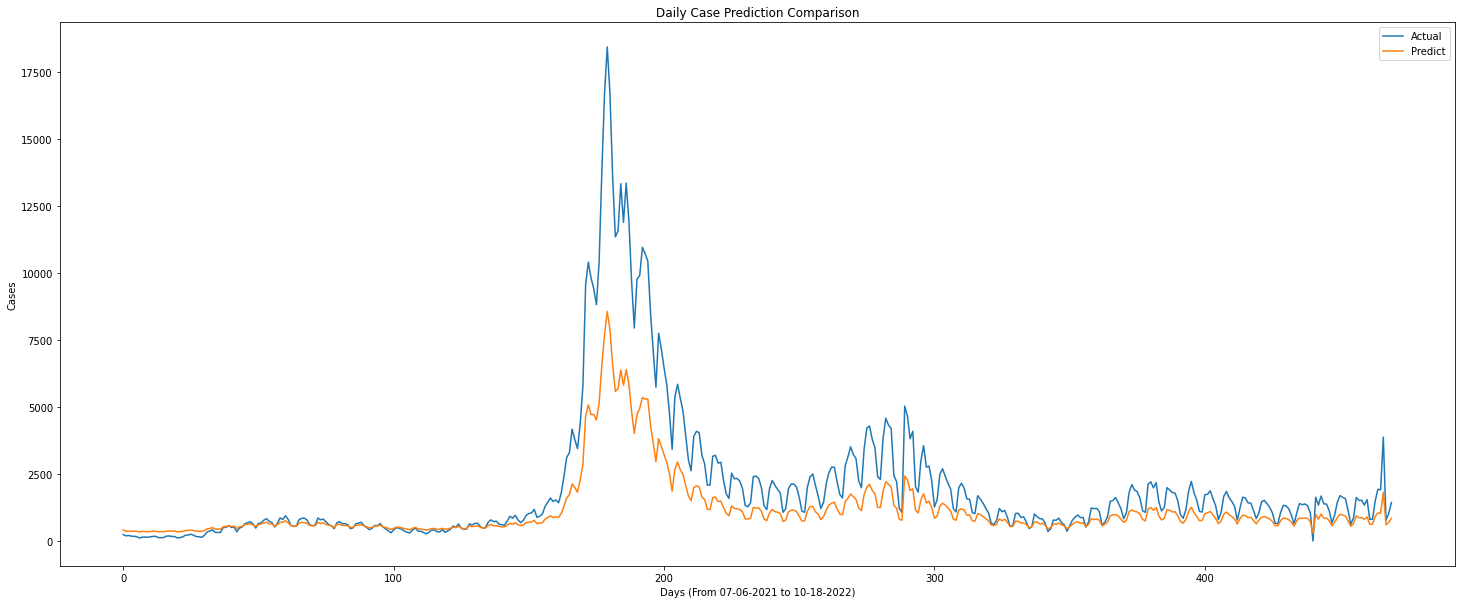

In [ ]:
#Evaluate the result
result = pd.read_csv("/content/test.csv")
plt.figure(figsize=(25, 10))

plt.plot(result['Total'])
plt.plot(result['Predicted_Total_Case'])
plt.title('Daily Case Prediction Comparison')
plt.ylabel('Cases')
plt.xlabel('Days (From 07-06-2021 to 10-18-2022)')
plt.legend(['Actual', 'Predict'])
plt.show()

In [ ]:
#Show results in a table
from google.colab import data_table
from vega_datasets import data

data_table.enable_dataframe_formatter()
result

Total  Predicted_Total_Case        Date
0      244            412.210887  2021-07-06
1      194            374.745627  2021-07-07
2      210            373.297922  2021-07-08
3      183            369.234046  2021-07-09
4      179            368.304359  2021-07-10
..     ...                   ...         ...
465   1916           1040.156963  2022-10-14
466   3880           1824.695619  2022-10-15
467    785            608.008228  2022-10-16
468   1030            698.776753  2022-10-17
469   1436            854.173575  2022-10-18

[470 rows x 3 columns]

##World Daily Case Analysis
Data used were collected from 1/22/2020 to 7/27/2020

In [ ]:
dataset2 = pd.read_csv("/content/full_grouped.csv")

In [ ]:
dataset2.head(10)

Date       Country/Region  Confirmed  Deaths  Recovered  Active  \
0  2020-01-22          Afghanistan          0       0          0       0   
1  2020-01-22              Albania          0       0          0       0   
2  2020-01-22              Algeria          0       0          0       0   
3  2020-01-22              Andorra          0       0          0       0   
4  2020-01-22               Angola          0       0          0       0   
5  2020-01-22  Antigua and Barbuda          0       0          0       0   
6  2020-01-22            Argentina          0       0          0       0   
7  2020-01-22              Armenia          0       0          0       0   
8  2020-01-22            Australia          0       0          0       0   
9  2020-01-22              Austria          0       0          0       0   

   New cases  New deaths  New recovered             WHO Region  
0          0           0              0  Eastern Mediterranean  
1          0           0              0                 Europe  
2          0           0              0                 Africa  
3          0           0              0                 Europe  
4          0           0              0                 Africa  
5          0           0              0               Americas  
6          0           0              0               Americas  
7          0           0              0                 Europe  
8          0           0              0        Western Pacific  
9          0           0              0                 Europe

In [ ]:
dataset2['active'] = dataset2['Confirmed'] - dataset2['Deaths'] - dataset2['Recovered']

In [ ]:
dataset2.sort_values(by ='Date', ascending = False, inplace= True)

In [ ]:
top = dataset2[dataset2['Date'] == dataset2['Date'].max()]
world = top.groupby('Country/Region')['Active','Confirmed','Deaths','Recovered'].sum().reset_index()
world.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Country/Region  Active  Confirmed  Deaths  Recovered
0          Afghanistan    9796      36263    1269      25198
1              Albania    1991       4880     144       2745
2              Algeria    7973      27973    1163      18837
3              Andorra      52        907      52        803
4               Angola     667        950      41        242
5  Antigua and Barbuda      18         86       3         65
6            Argentina   91782     167416    3059      72575
7              Armenia   10014      37390     711      26665
8            Australia    5825      15303     167       9311
9              Austria    1599      20558     713      18246

In [ ]:
#Show the active cases of COVID 19 in the world - From 01-22-2020 to 07-27-2020 based on the dataset provided.
fig = px.choropleth(world, locations ='Country/Region', 
                    locationmode = 'country names', color = 'Active',
                    range_color = [1,10000]
                   )
fig.show()

In [ ]:
#Show the active, confirmed cases, and deaths of COVID 19 in the world - From 01-22-2020 to 07-27-2020 based on the dataset provided.
date_cases = dataset2.groupby('Date')['Active','Confirmed','Deaths'].sum().reset_index()
date_cases['Date'] = pd.to_datetime(date_cases['Date'])
date_cases

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Date   Active  Confirmed  Deaths
0   2020-01-22      510        555      17
1   2020-01-23      606        654      18
2   2020-01-24      879        941      26
3   2020-01-25     1353       1434      42
4   2020-01-26     2010       2118      56
..         ...      ...        ...     ...
183 2020-07-23  6166006   15510481  633506
184 2020-07-24  6212290   15791645  639650
185 2020-07-25  6243930   16047190  644517
186 2020-07-26  6309711   16251796  648621
187 2020-07-27  6358362   16480485  654036

[188 rows x 4 columns]

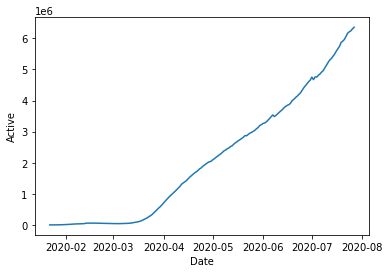

In [ ]:
#Show the active cases of COVID 19 in the world - From 01-22-2020 to 07-27-2020 based on the dataset provided.

sns.lineplot(x = 'Date', y ='Active', data = date_cases)

##World Daily Case Analysis & Death Prediction using a different dataset
To analyze the total cases in the world and predict daily deaths in each country.

Data used were collected from 1/22/2020 to 7/27/2020

In [ ]:
train_set_world = pd.read_csv("/content/covid_19_clean_complete.csv")

In [ ]:
train_set_world

Province/State         Country/Region        Lat       Long       Date  \
0                NaN            Afghanistan  33.939110  67.709953  1/22/2020   
1                NaN                Albania  41.153300  20.168300  1/22/2020   
2                NaN                Algeria  28.033900   1.659600  1/22/2020   
3                NaN                Andorra  42.506300   1.521800  1/22/2020   
4                NaN                 Angola -11.202700  17.873900  1/22/2020   
...              ...                    ...        ...        ...        ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  7/27/2020   
49064            NaN                  Yemen  15.552727  48.516388  7/27/2020   
49065            NaN                Comoros -11.645500  43.333300  7/27/2020   
49066            NaN             Tajikistan  38.861000  71.276100  7/27/2020   
49067            NaN                Lesotho -29.610000  28.233600  7/27/2020   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [ ]:
train_set_world.isnull().sum()


Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [ ]:
train_set_world_new = train_set_world.drop(['Province/State'], axis=1)
train_set_world_new

Country/Region        Lat       Long       Date  Confirmed  \
0                Afghanistan  33.939110  67.709953  1/22/2020          0   
1                    Albania  41.153300  20.168300  1/22/2020          0   
2                    Algeria  28.033900   1.659600  1/22/2020          0   
3                    Andorra  42.506300   1.521800  1/22/2020          0   
4                     Angola -11.202700  17.873900  1/22/2020          0   
...                      ...        ...        ...        ...        ...   
49063  Sao Tome and Principe   0.186400   6.613100  7/27/2020        865   
49064                  Yemen  15.552727  48.516388  7/27/2020       1691   
49065                Comoros -11.645500  43.333300  7/27/2020        354   
49066             Tajikistan  38.861000  71.276100  7/27/2020       7235   
49067                Lesotho -29.610000  28.233600  7/27/2020        505   

       Deaths  Recovered  Active             WHO Region  
0           0          0       0  Eastern Mediterranean  
1           0          0       0                 Europe  
2           0          0       0                 Africa  
3           0          0       0                 Europe  
4           0          0       0                 Africa  
...       ...        ...     ...                    ...  
49063      14        734     117                 Africa  
49064     483        833     375  Eastern Mediterranean  
49065       7        328      19                 Africa  
49066      60       6028    1147                 Europe  
49067      12        128     365                 Africa  

[49068 rows x 9 columns]

In [ ]:
#Take Date, Country, Lat, Long columns for the result csv file
train_set_world_new['Date'] = pd.to_datetime(train_set_world_new['Date'])
split_date = pd.datetime(2020,4,24) 
train_set_world_half = train_set_world_new.loc[train_set_world_new['Date']>split_date] 
ts_Date = train_set_world_half.pop('Date').reset_index(drop=True) 
ts_Deaths = train_set_world_half.pop('Deaths').reset_index(drop=True)
ts_Country = train_set_world_half.pop('Country/Region').reset_index(drop=True)
ts_Lat = train_set_world_half.pop('Lat').reset_index(drop=True)
ts_Long = train_set_world_half.pop('Long').reset_index(drop=True)
train_set_world_new['Date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
49063   2020-07-27
49064   2020-07-27
49065   2020-07-27
49066   2020-07-27
49067   2020-07-27
Name: Date, Length: 49068, dtype: datetime64[ns]

In [ ]:
fig = px.scatter_geo(train_set_world_new, lat='Lat', lon='Long', color='Country/Region', hover_name="WHO Region", hover_data=["Confirmed", "Deaths"], scope="world", basemap_visible = True)
fig.show()

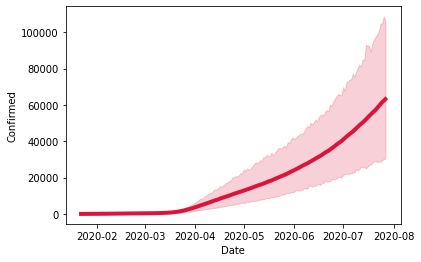

In [ ]:
sns.lineplot(x='Date',y='Confirmed',data=train_set_world_new,color='crimson',lw=4,ls='solid')

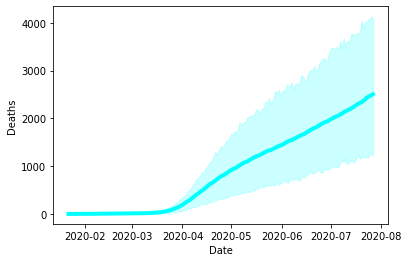

In [ ]:
sns.lineplot(x='Date',y='Deaths',data=train_set_world_new,color='cyan',lw=4,ls='solid')

In [ ]:
#Show50 countries that have the most confirmed cases in the world as of 7/27/2020
max_cases_country = train_set_world_new.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).reset_index()[:50]
max_cases_country

Country/Region  Confirmed
0                     US    4290259
1                 Brazil    2442375
2                  India    1480073
3                 Russia     816680
4           South Africa     452529
5                 Mexico     395489
6                   Peru     389717
7                  Chile     347923
8         United Kingdom     300111
9                   Iran     293606
10              Pakistan     274289
11                 Spain     272421
12          Saudi Arabia     268934
13              Colombia     257101
14                 Italy     246286
15                Turkey     227019
16            Bangladesh     226225
17                France     208665
18               Germany     207112
19             Argentina     167416
20                  Iraq     112585
21                 Qatar     109597
22             Indonesia     100303
23                 Egypt      92482
24            Kazakhstan      84648
25           Philippines      82040
26               Ecuador      81161
27                Sweden      79395
28                  Oman      77058
29               Bolivia      71181
30                 China      68135
31               Belarus      67251
32               Ukraine      67096
33               Belgium      66428
34                Kuwait      64379
35    Dominican Republic      64156
36                Israel      63985
37                Panama      61442
38  United Arab Emirates      59177
39                Canada      58728
40           Netherlands      53151
41             Singapore      50838
42              Portugal      50299
43               Romania      45902
44             Guatemala      45309
45                Poland      43402
46               Nigeria      41180
47              Honduras      39741
48               Bahrain      39482
49               Armenia      37390

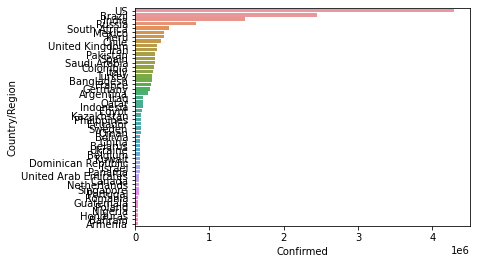

In [ ]:
#Show 50 countries that have the most confirmed cases in the world as of 7/27/2020
sns.barplot(data=max_cases_country,x='Confirmed',y='Country/Region', orient='h')

In [ ]:
#Show 50 countries that have the most death counts in the world as of 7/27/2020
max_deaths_country = train_set_world_new.groupby('Country/Region')['Deaths'].max().sort_values(ascending=False).reset_index()[:50]
max_deaths_country

Country/Region  Deaths
0                   US  148011
1               Brazil   87618
2       United Kingdom   45759
3               Mexico   44022
4                Italy   35112
5                India   33408
6               France   30096
7                Spain   28752
8                 Peru   18418
9                 Iran   15912
10              Russia   13334
11             Belgium    9822
12               Chile    9187
13             Germany    9125
14            Colombia    8777
15        South Africa    7067
16         Netherlands    6141
17            Pakistan    5842
18              Sweden    5700
19              Canada    5667
20              Turkey    5630
21             Ecuador    5532
22           Indonesia    4838
23               Egypt    4652
24               China    4512
25                Iraq    4458
26           Argentina    3059
27          Bangladesh    2965
28        Saudi Arabia    2760
29             Bolivia    2647
30             Romania    2206
31         Switzerland    1978
32         Philippines    1945
33             Ireland    1764
34           Guatemala    1761
35            Portugal    1719
36              Poland    1676
37             Ukraine    1636
38              Panama    1322
39          Kyrgyzstan    1301
40         Afghanistan    1269
41            Honduras    1166
42             Algeria    1163
43  Dominican Republic    1083
44               Japan     998
45             Nigeria     860
46             Moldova     748
47               Sudan     720
48             Austria     713
49             Armenia     711

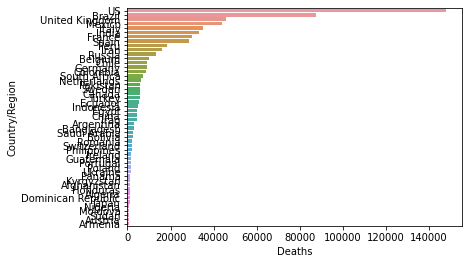

In [ ]:
#Show 50 countries that have the most death counts in the world as of 7/27/2020
sns.barplot(data=max_deaths_country,x='Deaths',y='Country/Region', orient='h')

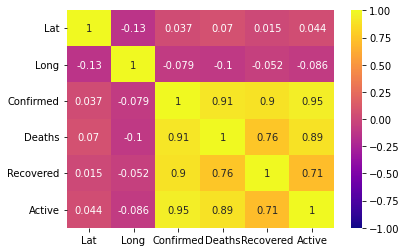

In [ ]:
#Show the correleations among the factors
sns.heatmap(train_set_world_new.corr(),annot=True,cmap='plasma',vmin=-1,vmax=1)

In [ ]:
#Set a train dataset
train_set_m2 = train_set_world_new.drop(['Country/Region','Lat','Long','WHO Region'], axis=1)

In [ ]:
#Split the dataset 50:50 - Test result will start from 4/25/2020 and end 7/27/2020
X = train_set_m2.drop(['Date','Deaths','Active'], axis=1)
y = train_set_m2['Deaths']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train)

(24534, 2)
(24534, 2)
(24534,)
(24534,)
       Confirmed  Recovered
0              0          0
1              0          0
2              0          0
3              0          0
4              0          0
...          ...        ...
24529          4          0
24530          1          1
24531          0          0
24532          0          0
24533          0          0

[24534 rows x 2 columns]


In [ ]:
S_scaler = StandardScaler()

X_train_scaled = S_scaler.fit_transform(X_train)
X_test_scaled = S_scaler.fit_transform(X_test)

In [ ]:
linear_model = LinearRegression()
LR_train = linear_model.fit(X_train_scaled, y_train)
print(LR_train.score(X_train_scaled, y_train))
print(LR_train.score(X_test_scaled, y_test))

0.8317195808835691
0.23532909913195021


In [ ]:
#Negative values = Predicted recovered, Positive values = Predicted deaths
Model_predict = LR_train.predict(X_test_scaled)
print(Model_predict)

[-102.7155007  -107.68796587  -87.49584268 ... -110.38766984  -50.59579565
 -109.67877583]


In [ ]:
#Export the data in a csv format
prediction = pd.DataFrame(Model_predict, columns=['Predicted_Deaths'])
concate_dataset = pd.concat([ts_Country, ts_Lat, ts_Long, ts_Date, ts_Deaths, prediction], axis=1)
concate_dataset.to_csv('test_world.csv', index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



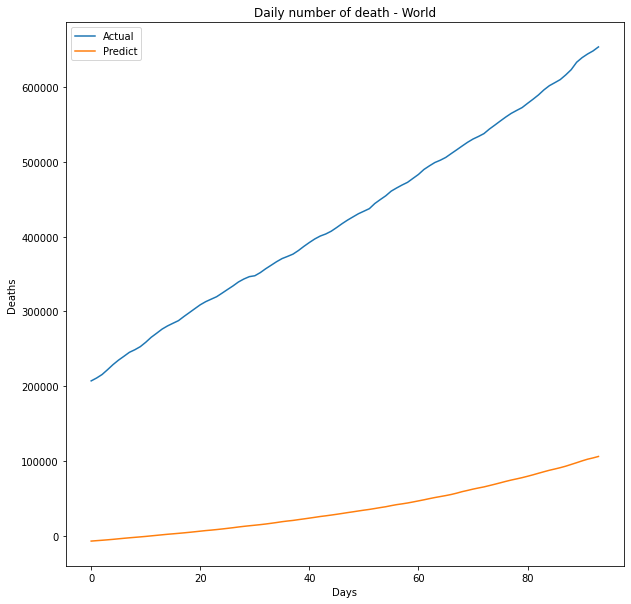

In [ ]:
#Evaluate the result by date: From 4/25/2020 to 7/27/2020
result = pd.read_csv("/content/test_world.csv")
world = result.groupby('Date')['Deaths','Predicted_Deaths'].sum().reset_index()
plt.figure(figsize=(10, 10))

plt.plot(world['Deaths'])
plt.plot(world['Predicted_Deaths'])
plt.title('Daily number of death - World')
plt.ylabel('Deaths')
plt.xlabel('Days')
plt.legend(['Actual', 'Predict'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



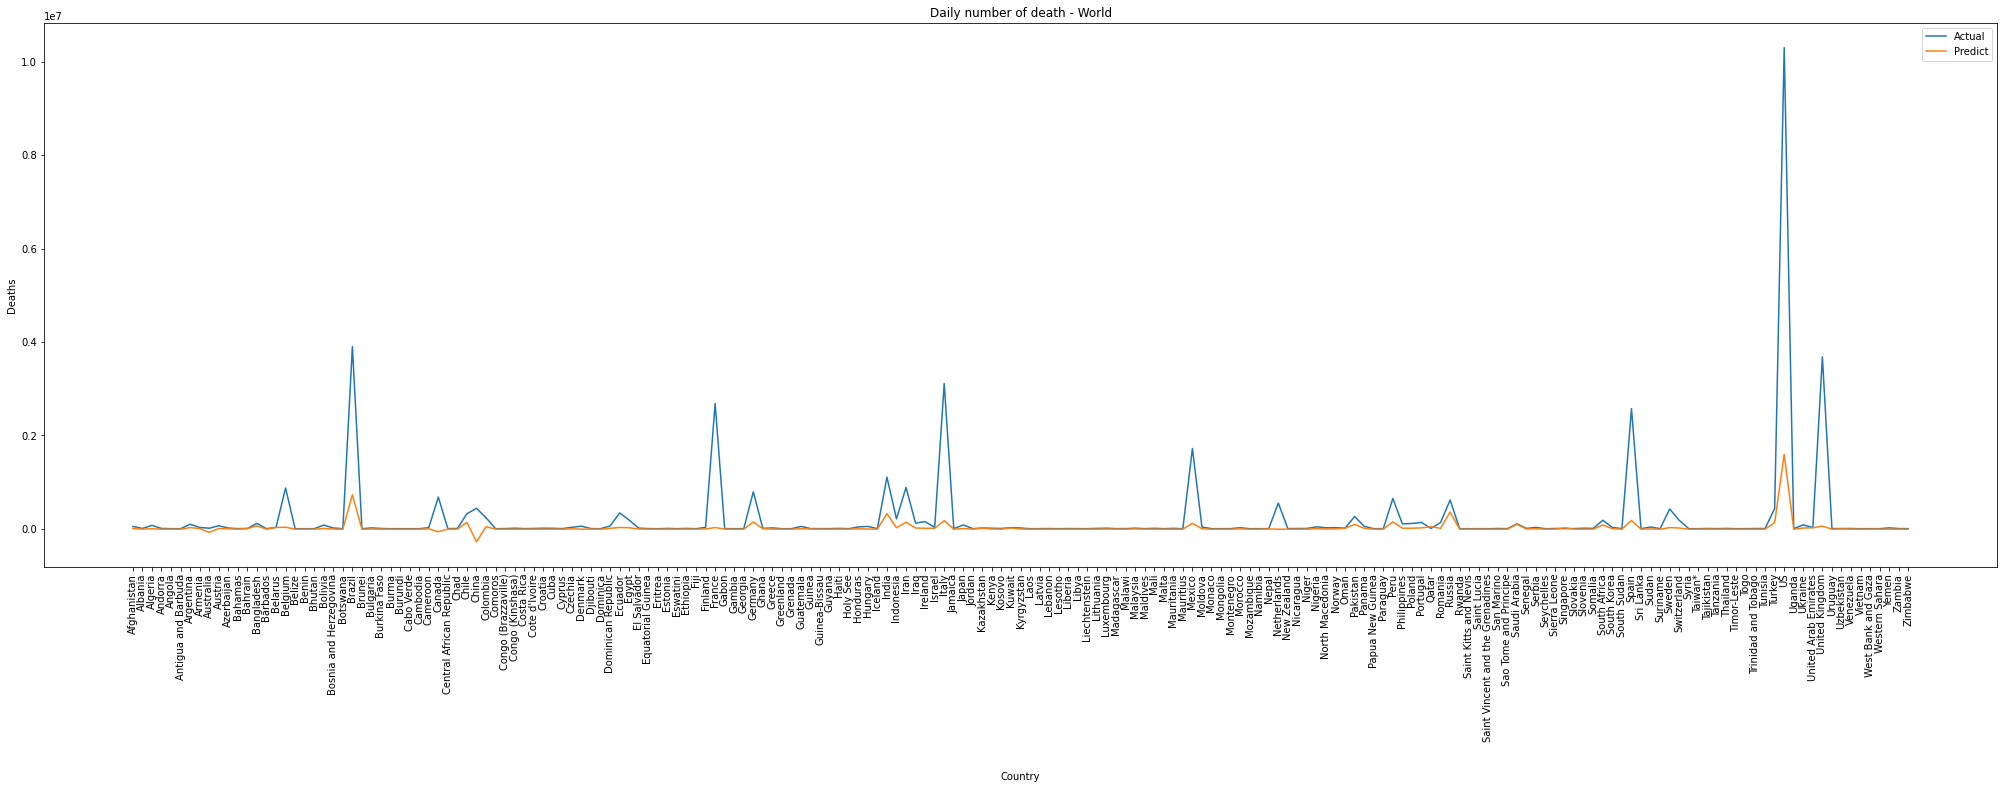

In [ ]:
#Evaluate the result by country From 4/25/2020 to 7/27/2020
plt.figure(figsize=(35, 10))
country = result.groupby('Country/Region')['Deaths','Predicted_Deaths'].sum().reset_index()
plt.plot(country['Country/Region'], country['Deaths'])
plt.plot(country['Country/Region'], country['Predicted_Deaths'])
plt.xticks(rotation=90)
plt.title('Daily number of death - World')
plt.ylabel('Deaths')
plt.xlabel('Country', labelpad=30)
plt.legend(['Actual', 'Predict'])
plt.show()

In [ ]:
#Actual and Predicted death count map. Negative values = Predicted recovered, Positive values = Predicted deaths From 4/25/2020 to 7/27/2020
fig = px.scatter_geo(result, lat='Lat', lon='Long', color='Country/Region', hover_name="Country/Region", hover_data=["Deaths", "Predicted_Deaths"], scope="world", basemap_visible = True)
fig.show()